# Agglomerative Clustering 层次聚类算法

## 读取源数据

In [11]:
import pandas as pd
import numpy as np

In [12]:
#读取源数据
data = pd.read_excel("../DataSource/result.xlsx")

## 构建距离矩阵并聚类

In [13]:
# 去除 'source ID' 列
data = data.drop('source ID', axis=1)

In [14]:
from scipy.cluster import hierarchy

# 准备数据，假设您的数据存储在变量data中

# 计算距离矩阵
distance_matrix = hierarchy.distance.pdist(data)

In [15]:
# 进行层次聚类
linkage = hierarchy.linkage(distance_matrix, method='average')

# 根据需求选择聚类数目，设置阈值
threshold = 2.0 # 示例阈值

# 获取聚类结果
clusters = hierarchy.fcluster(linkage, threshold, criterion='distance')

# 生成聚类标签
clustering_labels = np.array([f'Cluster {label}' for label in clusters])

# 获取聚类中心
clustering_center = np.mean(data, axis=0)

In [16]:
# 打印聚类结果
print(clusters)

[ 29  87  50  35  35  24  81 117 118  98  50 115   9  90  99 106 111  52
  66  59  76  82  74   7  78  35  72  85  33 112  42  92  13  58  25  47
  62  11  63 110  22 102  49  19  41  69  64  67  68  96  95  10  45  97
  93  35  60  51 104  75  37  86  94  12  14  46  84 105 116 101 119  17
  83 100  32 109  35  49  18  70 108   5  20  48 107  35  61  34  65   8
  35  26  38  54  30   3 114  35  21  15  88  77  35  28  80  36  43  50
  91  71  79   4  53  40   1  39  73  23   6 113  44  31  57  56  16  55
 103  89  27   2]


In [17]:
# 打印聚类结果和聚类中心
print("Clustering Labels:", clustering_labels)
print("Clustering Center:", clustering_center)

Clustering Labels: ['Cluster 29' 'Cluster 87' 'Cluster 50' 'Cluster 35' 'Cluster 35'
 'Cluster 24' 'Cluster 81' 'Cluster 117' 'Cluster 118' 'Cluster 98'
 'Cluster 50' 'Cluster 115' 'Cluster 9' 'Cluster 90' 'Cluster 99'
 'Cluster 106' 'Cluster 111' 'Cluster 52' 'Cluster 66' 'Cluster 59'
 'Cluster 76' 'Cluster 82' 'Cluster 74' 'Cluster 7' 'Cluster 78'
 'Cluster 35' 'Cluster 72' 'Cluster 85' 'Cluster 33' 'Cluster 112'
 'Cluster 42' 'Cluster 92' 'Cluster 13' 'Cluster 58' 'Cluster 25'
 'Cluster 47' 'Cluster 62' 'Cluster 11' 'Cluster 63' 'Cluster 110'
 'Cluster 22' 'Cluster 102' 'Cluster 49' 'Cluster 19' 'Cluster 41'
 'Cluster 69' 'Cluster 64' 'Cluster 67' 'Cluster 68' 'Cluster 96'
 'Cluster 95' 'Cluster 10' 'Cluster 45' 'Cluster 97' 'Cluster 93'
 'Cluster 35' 'Cluster 60' 'Cluster 51' 'Cluster 104' 'Cluster 75'
 'Cluster 37' 'Cluster 86' 'Cluster 94' 'Cluster 12' 'Cluster 14'
 'Cluster 46' 'Cluster 84' 'Cluster 105' 'Cluster 116' 'Cluster 101'
 'Cluster 119' 'Cluster 17' 'Cluster 83' 'Clust

## 评估

### 轮廓系数

In [18]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, clustering_labels)
print(silhouette_avg)

0.01576555822815361


#### Dumn指数和DB指数

In [20]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np

# 计算样本间的距离矩阵
distance_matrix = pairwise_distances(data)

# 计算类别内的最小距离
min_distances = np.min(distance_matrix[np.nonzero(distance_matrix)])

# 计算类间的最大距离
max_distances = np.max(distance_matrix)

# 计算Dunn指数
dunn_index = min_distances / max_distances

# 计算DB指数
db_index = davies_bouldin_score(data, clusters)

# 打印指数
print("Dunn Index:", dunn_index)
print("DB Index:", db_index)

Dunn Index: 0.12309149097933274
DB Index: 0.32871999547509245


## 可视化

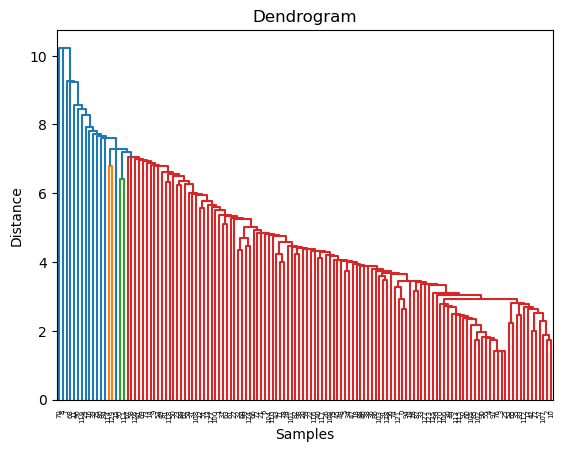

In [21]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# 计算距离矩阵
distance_matrix = hierarchy.distance.pdist(data)

# 进行层次聚类
linkage = hierarchy.linkage(distance_matrix, method='average')

# 绘制树状图
dendrogram = hierarchy.dendrogram(linkage)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

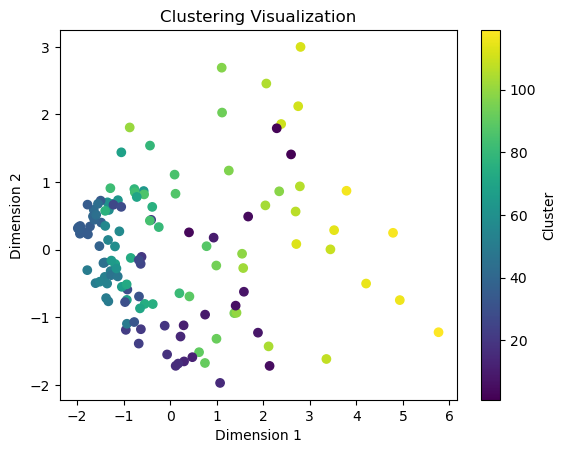

In [22]:
import matplotlib.pyplot as plt

# 使用降维方法如PCA将数据映射到二维空间
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 绘制散点图，颜色表示聚类结果
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()